In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
import networkx as net
from bokeh.io import output_notebook, show, save

cont = 0

In [2]:
print(os.getcwd())
print(os.listdir())

/Users/barbem4/Desktop/Vandy/Bioinformatics/Second project
['distribution plot with power law.png', 'distribution plot.png', '.DS_Store', 'PP-Pathways_ppi.xlsx', 'First graph.png', 'pathways-network.html', 'PP-Pathways_ppi.csv', 'Ego graph.png', 'Net analysis.ipynb', 'PP-Pathways_ppi.txt', 'PP-Pathways_ppi copy.csv']


In [3]:
df = pd.read_csv('PP-Pathways_ppi.csv')
df


,1394,2778
0,6331,17999
1,122704,54460
2,2597,2911
3,4790,79155
4,6146,101929876
...,...,...
342347,10969,4670
342348,6774,55748
342349,23299,399693
342350,9247,337967


In [4]:
edges = [(t,v) for t,v in df.values]
edges_red = [(t,v) for t,v in df.values if (t>2500000)]
print(len(edges), len(edges_red))

342352 1113


In [5]:
#Build the graph
G = net.Graph()

In [6]:
G.add_edges_from(edges)

In [111]:
STOP = input('Do you really want to rerun the network graph? (y/n)')


if STOP =='y':
    plt.figure(figsize = (10,10))
    net.draw(G, pos = net.nx_pydot.graphviz_layout(G),alpha = alpha_list, node_color = color_list,node_size = 16,linewidths = 0.2)
    plt.savefig(os.getcwd()+file_name)
else:
    print('Graph not rerun')



Graph not rerun


<Figure size 400x400 with 0 Axes>

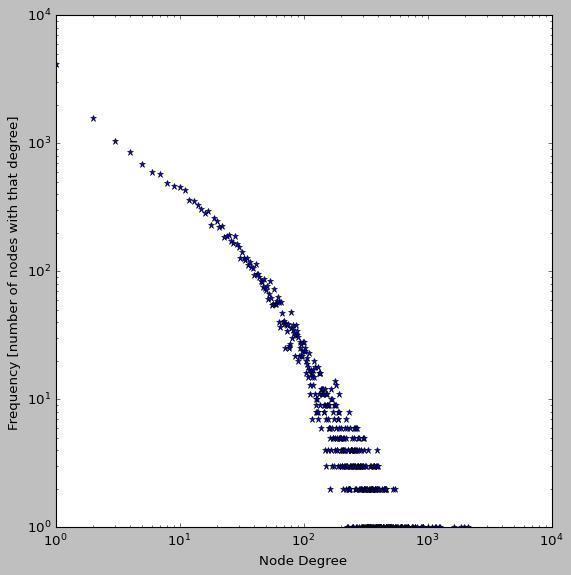

<Figure size 640x480 with 0 Axes>

In [49]:
plt.style.use('classic')

plt.figure(figsize=(5,5))

degree_freq = net.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(8,8)) 
plt.loglog(degrees, degree_freq,'*') 
plt.xlabel('Node Degree',fontsize = 12)
plt.ylabel('Frequency [number of nodes with that degree]', fontsize = 12)

plt.show()

plt.savefig(os.getcwd()+'/distribution plot.png')


In [9]:
def powerfit(x, y):
    """line fitting on log-log scale"""
    k, m = np.polyfit(np.log10(x), np.log10(y), 1)
    return 10**m * x**(k),k

gamma= -1.55


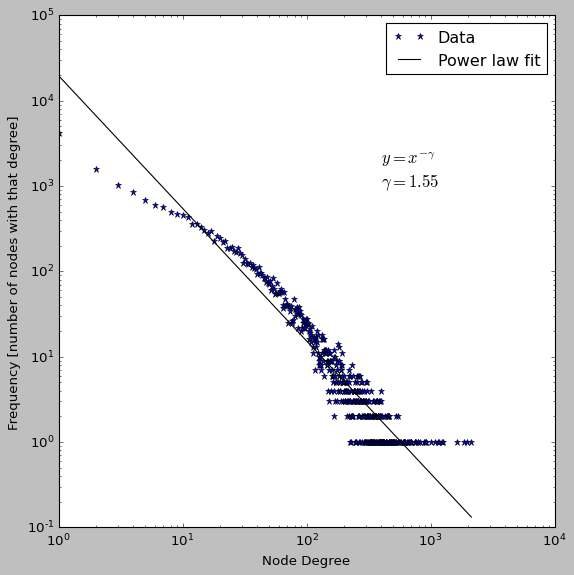

In [22]:
#Fit a power law to the data and get gamma coefficient

degree_freq = net.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(8,8)) 
plt.loglog(degrees, degree_freq,'*') 
plt.xlabel('Node Degree',fontsize = 12)
plt.ylabel('Frequency [number of nodes with that degree]', fontsize = 12)

#Remove where degree freq is zero
idxs = np.where(np.array(degree_freq) != 0)[0]
degree_freq = list(map(degree_freq.__getitem__, idxs))
degrees = list(map(degrees.__getitem__, idxs))

ys,gamma = powerfit(degrees, degree_freq)

plt.plot(degrees,ys,color='black')
plt.legend(['Data','Power law fit'])
plt.text(400,1000,r'$y = x^{-\gamma} $'+'\n'+ '$\gamma = $' + "$"+str(np.round(abs(gamma), decimals = 2))+'$', fontsize = 15)

print('gamma=',np.round(gamma, decimals = 2))



plt.savefig(os.getcwd()+'healthy distribution')

In [3]:
#Set relevant nodes list
relevant_nodes  = [7157,4089,5594,2475,1956,3815,7471,613,111,2984,596,836]

In [103]:
STOP = input('Do you really want to rerun the network graph? (y/n)')


if STOP =='y':
    betweenness = net.betweenness_centrality(G)
    degrees = net.degree(G)
else:
    print('Cell not run')

In [104]:
#Degree and betweeness for the relevant nodes
for rel_node in relevant_nodes:
    print(rel_node, ': ',betweenness[rel_node], ' ', degrees[rel_node])


7157 :  0.014612361942070776   1001
4089 :  0.0032694151583897327   302
5594 :  0.002804134727255818   402
2475 :  0.0009715755894195488   162
1956 :  0.011716081722307946   926
3815 :  0.00016088025265833324   75
7471 :  1.4910003827595982e-05   12
613 :  0.00029028896843771466   97
111 :  0.0006290454228457274   42
2984 :  2.3918776887055088e-05   28
596 :  0.00043869217873866793   136
836 :  0.0008475877603315558   183


In [7]:
G_disease = G.copy()
G_disease.remove_node(7157) #Remove TP53

In [124]:
STOP = input('Do you really want to rerun the network graph? (y/n)')


if STOP =='y':

    betweenness_disease = net.betweenness_centrality(G_disease)
    degrees_disease = net.degree(G_disease)
else:
    print('metrics not calculated')

In [128]:
#Degree and betweeness for the relevant nodes
print('Disease state: Knocking out TP53')
for rel_node in relevant_nodes[1:]:
    print(rel_node, ': ',betweenness_disease[rel_node], ' ', degrees_disease[rel_node])

Disease state: Knocking out TP53
4089 :  0.0032974545354323595   302
5594 :  0.0028178833819431127   401
2475 :  0.0009580454468958373   161
1956 :  0.011771535546204427   925
3815 :  0.000161439345528419   75
7471 :  1.487135323263626e-05   12
613 :  0.00028433513957576325   96
111 :  0.0006295068362109071   42
2984 :  2.4275529700886124e-05   28
596 :  0.0005538446958794625   135
836 :  0.0009025959592874203   183


In [126]:
#highlight with color the proteins of interest
SELECTED, REST = "red", "skyblue"
node_color = []
edges_color = []

for node in G.nodes(data=True):
    node_color.append(SELECTED if node in relevant_nodes else REST)


for node1,node2,_ in G.edges(data=True):
    edges_color.append('g' if (node1 or node2) in [7157] else 'lightgray')

In [153]:
#Top 10 overall betweenness and degree proteins in the healthy and disease network
print('*****************  Healthy network  *****************')
print('Betweenness',sorted(betweenness.items(), key=lambda x:x[1], reverse=True)[:10])
print('Degree',sorted(dict(degrees).items(), key=lambda x:x[1], reverse=True)[:10])
print('*****************  Diseased network  *****************')
print('Betweenness',sorted(betweenness_disease.items(), key=lambda x:x[1], reverse=True)[:10])
print('Degree',sorted(dict(degrees_disease).items(), key=lambda x:x[1], reverse=True)[:10])

*****************  Healthy network  *****************
Betweenness [(351, 0.07407050161463212), (7316, 0.0687583921063116), (1994, 0.054702823795382556), (4914, 0.032023381395400126), (9515, 0.021580949165472943), (10482, 0.018013334900974697), (7514, 0.017970317205255538), (2885, 0.017220254554638964), (4343, 0.01603071645098824), (801, 0.01542442355073131)]
Degree [(351, 2132), (4914, 1965), (1994, 1865), (7316, 1646), (7514, 1255), (8452, 1228), (4343, 1177), (10482, 1153), (2885, 1081), (1956, 925)]
*****************  Diseased network  *****************
Betweenness [(351, 0.07454589884471305), (7316, 0.069092335855725), (1994, 0.055076585360768406), (4914, 0.032324078296017675), (9515, 0.02156789168811798), (10482, 0.01822864072121194), (7514, 0.018032313368588675), (2885, 0.01746939077213142), (4343, 0.01607050323278482), (801, 0.01545358785365958)]
Degree [(351, 2132), (4914, 1965), (1994, 1865), (7316, 1646), (7514, 1255), (8452, 1228), (4343, 1177), (10482, 1153), (2885, 1081), 

448 448
gamma= -1.55


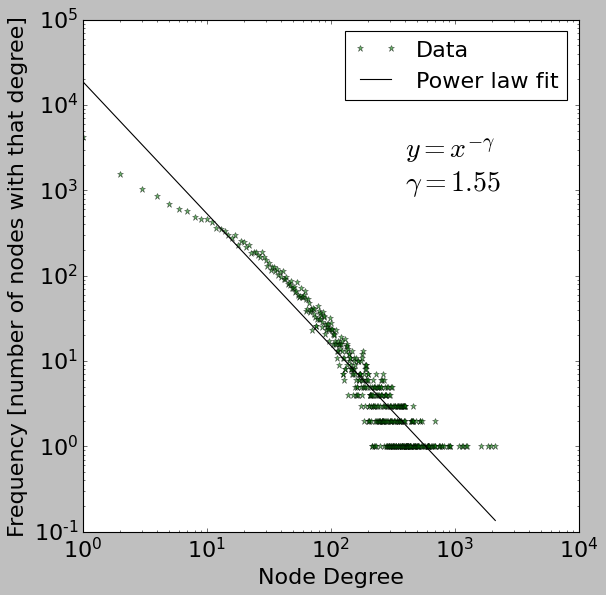

In [14]:
#Fit a power law to the data and get gamma coefficient

degree_freq = net.degree_histogram(G_disease)
degrees = range(len(degree_freq))
plt.figure(figsize=(8,8)) 
plt.loglog(degrees, degree_freq,'*', color='green', alpha=0.6) 
plt.xlabel('Node Degree',fontsize = 20)
plt.ylabel('Frequency [number of nodes with that degree]', fontsize = 20)
plt.tick_params(axis = 'both', labelsize=20)

#Remove where degree freq is zero
idxs = np.where(np.array(degree_freq) != 0)[0]
degree_freq = list(map(degree_freq.__getitem__, idxs))
degrees = list(map(degrees.__getitem__, idxs))
print(len(degrees), len(degree_freq))

ys,gamma = powerfit(degrees[1:], degree_freq[1:])

plt.plot(degrees[1:],ys,color='black')
plt.legend(['Data','Power law fit'], fontsize = 20)
plt.text(400,1000,r'$y = x^{-\gamma} $'+'\n'+ '$\gamma = $' + "$"+str(np.round(abs(gamma), decimals = 2))+'$', fontsize = 25)

print('gamma=',np.round(gamma, decimals = 2))



plt.savefig(os.getcwd()+'/diseased distribution.png')

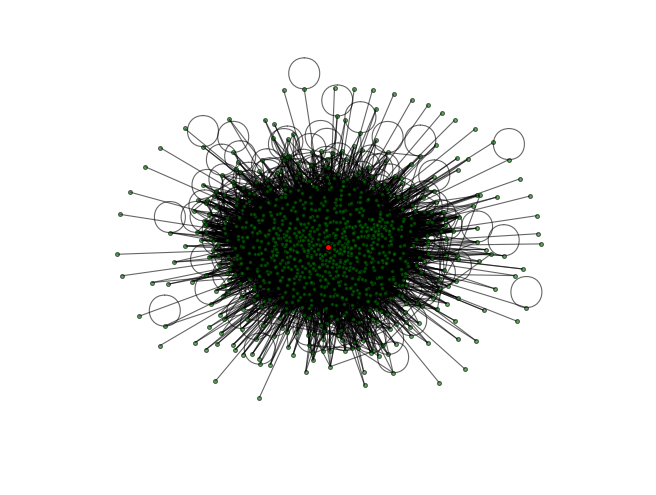

<Figure size 640x480 with 0 Axes>

In [20]:
# Create ego graph of main hub
hub_ego = net.ego_graph(G, 7157)

# Draw graph
pos = net.spring_layout(hub_ego, seed=20532)  # Seed layout for reproducibility
net.draw(hub_ego, pos, node_color="g", node_size=12, with_labels=False, alpha = 0.6)

# Draw ego as large and red
options = {"node_size": 30, "node_color": "r"}
options2 = {'node_size':30, 'node_color': 'lime'}
net.draw_networkx_nodes(hub_ego, pos, nodelist=[7157], **options)
plt.show()

plt.savefig(os.getcwd()+'/Ego graph ')